In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor 

In [2]:
import os
os.listdir('input')

['fulfilment_center_info.csv',
 'meal_info.csv',
 'sample_submission_hSlSoT6.csv',
 'test_processed.csv',
 'test_QoiMO9B.csv',
 'train.csv',
 'train_processed.csv']

In [81]:
df_train = pd.read_csv('input/train_processed.csv')

In [56]:
df_train = pd.read_csv('input/train_processed.csv')
df_submit = pd.read_csv('input/test_processed.csv')

In [82]:
#Preparing dtaframe for catboost
df_tmp = df_train.drop(['Unnamed: 0','id','center_id', 'meal_id',
       'city_code', 'region_code', 'city_region',
       'center_type', 'category', 'cuisine','num_orders_log1p',
        'city_code', 'region_code'], axis=1)

In [55]:
#Preparing dtaframe for catboost
df_tmp = df_train.drop(['Unnamed: 0','id','center_id_encoded', 'meal_id_encoded',
       'city_code_encoded', 'region_code_encoded', 'city_region_encoded',
       'center_type_encoded', 'category_encoded', 'cuisine_encoded','num_orders_log1p',
        'city_code', 'region_code'], axis=1)

In [83]:
df_tmp['Quarter']=(df_tmp['week']/13).astype('int64')
df_tmp['Quarter'] = df_tmp['Quarter'].map({0:'Q1',
                         1:'Q2',
                         2:'Q3',
                         3:'Q4',
                         4:'Q1',
                         5:'Q2',
                         6:'Q3',
                         7:'Q4',
                         8:'Q1',
                         9:'Q2',
                         10:'Q3',
                         11:'Q4'})

df_tmp['Year']=(df_tmp['week']/52).astype('int64')
df_tmp['Year'] = df_tmp['Year'].map({0:'Y1',
                         1:'Y2',
                         2:'Y3',
                         3:'Y4',
                         4:'Y5'})

In [ ]:
columns_to_train_lgbm = ['week',
                    'week_sin',
                    'week_cos',
                    'checkout_price',
                    'base_price',
                    'discount',
                    'rate_of_discount',
                    'emailer_for_promotion',
                    'homepage_featured',
                    'city_region_encoded',
                    'center_type_encoded',
                    'op_area',
                    'category_encoded',
                    'cuisine_encoded',
                    'center_id_encoded',
                    'meal_id_encoded']

categorical_columns_lgbm = ['emailer_for_promotion',
                       'homepage_featured',
                       'city_region_encoded',
                       'center_type_encoded',
                       'category_encoded',
                       'cuisine_encoded',
                       'center_id_encoded',
                       'meal_id_encoded']

numerical_columns_lgbm = [col for col in columns_to_train_lgbm if col not in categorical_columns_lgbm]

In [ ]:
cat_cols_catboost111 = ['meal_id',
                     'center_id',
                     'emailer_for_promotion',
                     'homepage_featured',
                     'city_region',
                     'center_type',
                     'category',
                     'cuisine',
                    'Quarter',
                    'Year'
                    ]

In [84]:
cat_cols_catboost = ['week','meal_id_encoded',
                     'center_id_encoded',
                     'emailer_for_promotion',
                     'homepage_featured',
                     'city_region_encoded',
                     'center_type_encoded',
                     'category_encoded',
                     'cuisine_encoded',
                    'Quarter',
                    'Year'
                    ]

In [23]:
df_tmp.columns

Index(['week', 'checkout_price', 'base_price', 'emailer_for_promotion',
       'homepage_featured', 'num_orders', 'op_area', 'discount',
       'rate_of_discount', 'week_sin', 'week_cos', 'center_id_encoded',
       'meal_id_encoded', 'city_code_encoded', 'region_code_encoded',
       'city_region_encoded', 'center_type_encoded', 'category_encoded',
       'cuisine_encoded', 'Quarter', 'Year'],
      dtype='object')

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df_tmp.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_tmp[top_corr_features].corr(),annot=True)

In [85]:
y = df_tmp['num_orders']
X = df_tmp.drop('num_orders', axis=1)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.03, 
                                                    shuffle=False)

In [100]:
model = CatBoostRegressor(cat_features = cat_cols_catboost, eval_metric='MSLE', ignored_features = ['week_cos'], early_stopping_rounds=500)

In [88]:
#grid = {'learning_rate': [0.01, 0.1, 1], 'depth':[4,6,8]}

In [89]:
#grid_search_resut = model.grid_search(grid, X=X_train, y=y_train, plot=True)

In [90]:
#params = grid_search_resut.get('params')

In [101]:
model.fit(X, y, cat_features = cat_cols_catboost)

Learning rate set to 0.116088
0:	learn: 1.7518766	total: 926ms	remaining: 15m 24s
1:	learn: 1.6110079	total: 1.48s	remaining: 12m 18s
2:	learn: 1.4940856	total: 1.95s	remaining: 10m 48s
3:	learn: 1.3898574	total: 2.65s	remaining: 11m 1s
4:	learn: 1.3005798	total: 3.17s	remaining: 10m 31s
5:	learn: 1.2151666	total: 3.85s	remaining: 10m 38s
6:	learn: 1.1454169	total: 4.41s	remaining: 10m 25s
7:	learn: 1.0774371	total: 4.79s	remaining: 9m 54s
8:	learn: 1.0261183	total: 5.48s	remaining: 10m 3s
9:	learn: 0.9514741	total: 6.19s	remaining: 10m 12s
10:	learn: 0.8879908	total: 6.62s	remaining: 9m 55s
11:	learn: 0.8321821	total: 7.4s	remaining: 10m 9s
12:	learn: 0.7819434	total: 7.82s	remaining: 9m 53s
13:	learn: 0.7327592	total: 8.58s	remaining: 10m 4s
14:	learn: 0.6919909	total: 9.1s	remaining: 9m 57s
15:	learn: 0.6585164	total: 9.75s	remaining: 9m 59s
16:	learn: 0.6302493	total: 10.5s	remaining: 10m 7s
17:	learn: 0.6050679	total: 11.1s	remaining: 10m 7s
18:	learn: 0.5782956	total: 11.8s	remai

166:	learn: nan	total: 2m 4s	remaining: 10m 21s
167:	learn: nan	total: 2m 5s	remaining: 10m 21s
168:	learn: nan	total: 2m 6s	remaining: 10m 20s
169:	learn: nan	total: 2m 7s	remaining: 10m 20s
170:	learn: nan	total: 2m 7s	remaining: 10m 19s
171:	learn: nan	total: 2m 8s	remaining: 10m 19s
172:	learn: nan	total: 2m 9s	remaining: 10m 18s
173:	learn: nan	total: 2m 10s	remaining: 10m 18s
174:	learn: nan	total: 2m 11s	remaining: 10m 17s
175:	learn: nan	total: 2m 11s	remaining: 10m 17s
176:	learn: nan	total: 2m 12s	remaining: 10m 16s
177:	learn: nan	total: 2m 13s	remaining: 10m 16s
178:	learn: nan	total: 2m 14s	remaining: 10m 15s
179:	learn: nan	total: 2m 14s	remaining: 10m 14s
180:	learn: nan	total: 2m 15s	remaining: 10m 14s
181:	learn: nan	total: 2m 16s	remaining: 10m 13s
182:	learn: nan	total: 2m 17s	remaining: 10m 12s
183:	learn: nan	total: 2m 17s	remaining: 10m 11s
184:	learn: nan	total: 2m 18s	remaining: 10m 10s
185:	learn: nan	total: 2m 19s	remaining: 10m 10s
186:	learn: nan	total: 2m 2

338:	learn: nan	total: 4m 16s	remaining: 8m 19s
339:	learn: nan	total: 4m 16s	remaining: 8m 18s
340:	learn: nan	total: 4m 17s	remaining: 8m 17s
341:	learn: nan	total: 4m 18s	remaining: 8m 17s
342:	learn: nan	total: 4m 19s	remaining: 8m 16s
343:	learn: nan	total: 4m 19s	remaining: 8m 15s
344:	learn: nan	total: 4m 20s	remaining: 8m 14s
345:	learn: nan	total: 4m 21s	remaining: 8m 13s
346:	learn: nan	total: 4m 22s	remaining: 8m 13s
347:	learn: nan	total: 4m 22s	remaining: 8m 12s
348:	learn: nan	total: 4m 23s	remaining: 8m 11s
349:	learn: nan	total: 4m 24s	remaining: 8m 11s
350:	learn: nan	total: 4m 25s	remaining: 8m 10s
351:	learn: nan	total: 4m 25s	remaining: 8m 9s
352:	learn: nan	total: 4m 26s	remaining: 8m 9s
353:	learn: nan	total: 4m 27s	remaining: 8m 8s
354:	learn: nan	total: 4m 28s	remaining: 8m 7s
355:	learn: nan	total: 4m 29s	remaining: 8m 6s
356:	learn: nan	total: 4m 29s	remaining: 8m 6s
357:	learn: nan	total: 4m 30s	remaining: 8m 5s
358:	learn: nan	total: 4m 31s	remaining: 8m 4s


511:	learn: nan	total: 6m 27s	remaining: 6m 9s
512:	learn: nan	total: 6m 28s	remaining: 6m 8s
513:	learn: nan	total: 6m 29s	remaining: 6m 8s
514:	learn: nan	total: 6m 30s	remaining: 6m 7s
515:	learn: nan	total: 6m 30s	remaining: 6m 6s
516:	learn: nan	total: 6m 31s	remaining: 6m 5s
517:	learn: nan	total: 6m 32s	remaining: 6m 5s
518:	learn: nan	total: 6m 33s	remaining: 6m 4s
519:	learn: nan	total: 6m 33s	remaining: 6m 3s
520:	learn: nan	total: 6m 34s	remaining: 6m 2s
521:	learn: nan	total: 6m 35s	remaining: 6m 2s
522:	learn: nan	total: 6m 36s	remaining: 6m 1s
523:	learn: nan	total: 6m 36s	remaining: 6m
524:	learn: nan	total: 6m 37s	remaining: 5m 59s
525:	learn: nan	total: 6m 38s	remaining: 5m 58s
526:	learn: nan	total: 6m 39s	remaining: 5m 58s
527:	learn: nan	total: 6m 39s	remaining: 5m 57s
528:	learn: nan	total: 6m 40s	remaining: 5m 56s
529:	learn: nan	total: 6m 41s	remaining: 5m 55s
530:	learn: nan	total: 6m 42s	remaining: 5m 55s
531:	learn: nan	total: 6m 42s	remaining: 5m 54s
532:	lea

684:	learn: nan	total: 8m 39s	remaining: 3m 59s
685:	learn: nan	total: 8m 40s	remaining: 3m 58s
686:	learn: nan	total: 8m 41s	remaining: 3m 57s
687:	learn: nan	total: 8m 42s	remaining: 3m 56s
688:	learn: nan	total: 8m 42s	remaining: 3m 55s
689:	learn: nan	total: 8m 43s	remaining: 3m 55s
690:	learn: nan	total: 8m 44s	remaining: 3m 54s
691:	learn: nan	total: 8m 44s	remaining: 3m 53s
692:	learn: nan	total: 8m 45s	remaining: 3m 53s
693:	learn: nan	total: 8m 46s	remaining: 3m 52s
694:	learn: nan	total: 8m 47s	remaining: 3m 51s
695:	learn: nan	total: 8m 48s	remaining: 3m 50s
696:	learn: nan	total: 8m 49s	remaining: 3m 49s
697:	learn: nan	total: 8m 50s	remaining: 3m 49s
698:	learn: nan	total: 8m 50s	remaining: 3m 48s
699:	learn: nan	total: 8m 51s	remaining: 3m 47s
700:	learn: nan	total: 8m 52s	remaining: 3m 46s
701:	learn: nan	total: 8m 52s	remaining: 3m 46s
702:	learn: nan	total: 8m 53s	remaining: 3m 45s
703:	learn: nan	total: 8m 54s	remaining: 3m 44s
704:	learn: nan	total: 8m 55s	remaining:

855:	learn: nan	total: 10m 54s	remaining: 1m 50s
856:	learn: nan	total: 10m 55s	remaining: 1m 49s
857:	learn: nan	total: 10m 55s	remaining: 1m 48s
858:	learn: nan	total: 10m 56s	remaining: 1m 47s
859:	learn: nan	total: 10m 57s	remaining: 1m 47s
860:	learn: nan	total: 10m 58s	remaining: 1m 46s
861:	learn: nan	total: 10m 58s	remaining: 1m 45s
862:	learn: nan	total: 10m 59s	remaining: 1m 44s
863:	learn: nan	total: 11m	remaining: 1m 43s
864:	learn: nan	total: 11m 1s	remaining: 1m 43s
865:	learn: nan	total: 11m 2s	remaining: 1m 42s
866:	learn: nan	total: 11m 2s	remaining: 1m 41s
867:	learn: nan	total: 11m 3s	remaining: 1m 40s
868:	learn: nan	total: 11m 4s	remaining: 1m 40s
869:	learn: nan	total: 11m 5s	remaining: 1m 39s
870:	learn: nan	total: 11m 5s	remaining: 1m 38s
871:	learn: nan	total: 11m 6s	remaining: 1m 37s
872:	learn: nan	total: 11m 7s	remaining: 1m 37s
873:	learn: nan	total: 11m 8s	remaining: 1m 36s
874:	learn: nan	total: 11m 8s	remaining: 1m 35s
875:	learn: nan	total: 11m 9s	remai

In [111]:
y_predict = model.predict(X_test)

In [72]:
#y_pred = np.expm1(y_predict)

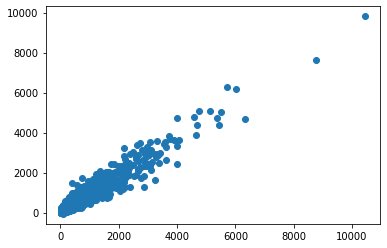

In [112]:
plt.scatter(y_test, y_predict)

In [113]:
y_pred_s = pd.Series(y_predict)
count, division = np.histogram(y_pred_s)
print(f"Data_Slice: {division}")
print(f"Count: {count}")
y_pred_s.describe()

Data_Slice: [ -64.41751983  923.86819241 1912.15390464 2900.43961688 3888.72532912
 4877.01104136 5865.29675359 6853.58246583 7841.86817807 8830.15389031
 9818.43960255]
Count: [13078   523    55    28     6     3     2     1     0     1]


count    13697.000000
mean       261.827579
std        375.830575
min        -64.417520
25%         62.278950
50%        135.445859
75%        326.814463
max       9818.439603
dtype: float64

In [114]:
y_pred_less_than_0 = y_pred_s[y_pred_s < 0]
print(y_pred_less_than_0.values)

[-64.41751983  -0.99836991  -0.73712453  -3.38367262  -5.92593878
  -4.50650317  -4.30371298  -4.55102672  -7.62652669  -7.47675396]


In [115]:
# negative requirement doesn't mean anything.
y_predict[y_predict < 0] = 0

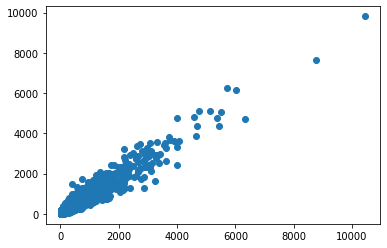

In [116]:
plt.scatter(y_test, y_predict)

In [118]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error( y_test, y_predict ))

0.4859365998182292

In [99]:
import joblib
filename = 'model1_497029.sav'
joblib.dump(model, filename)

['model1_497029.sav']

In [ ]:
0.4859365998182292